In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#Path and Dropping NaN values
# path = r'C:\Users\layoc\OneDrive\Documents\VSCodeLearn\Life Expectancy Data.csv'
# Change path to suit your local environment
data = pd.read_csv('LifeExpectancy.csv')
cleanData = data.dropna()

#Variables for Multiple Linear Regression
# or we can use an index to slice
X = cleanData[['Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI','under-five deaths','Polio','Total expenditure',
               'Diphtheria ','HIV/AIDS','GDP','Population','thinness  1-19 years','thinness 5-9 years','Income composition of resources','Schooling']]
y = cleanData[['Life expectancy']]

#train_test_split method for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [10]:
#Importing DecisionTreeRegesor so we can predict from class labels of data points instead of numerical

from sklearn.tree import DecisionTreeRegressor

treeReg = DecisionTreeRegressor(
    max_depth=5,              # Set the maximum depth of the tree
    min_samples_split=5,      # Set the minimum samples required to split a node
    min_samples_leaf=2,       # Set the minimum samples required in a leaf node
    max_leaf_nodes=None,      # Limit the maximum number of leaf nodes (optional)
    min_impurity_decrease=0.0)

treeReg.fit(X_train, y_train)

yTreeTest_pred = treeReg.predict(X_test)

In [3]:
#MSE and R squared for test and train data for the DecisionTree
mse_treeTest = mean_squared_error(y_test, yTreeTest_pred)
r2_treeTest = r2_score(y_test, yTreeTest_pred)

print(f"Decision Tree testing data MSE: {mse_treeTest}")
print(f"Decision Tree testing R squared: {r2_treeTest}")

Decision Tree testing data MSE: 10.749181495884852
Decision Tree testing R squared: 0.8486510071506448


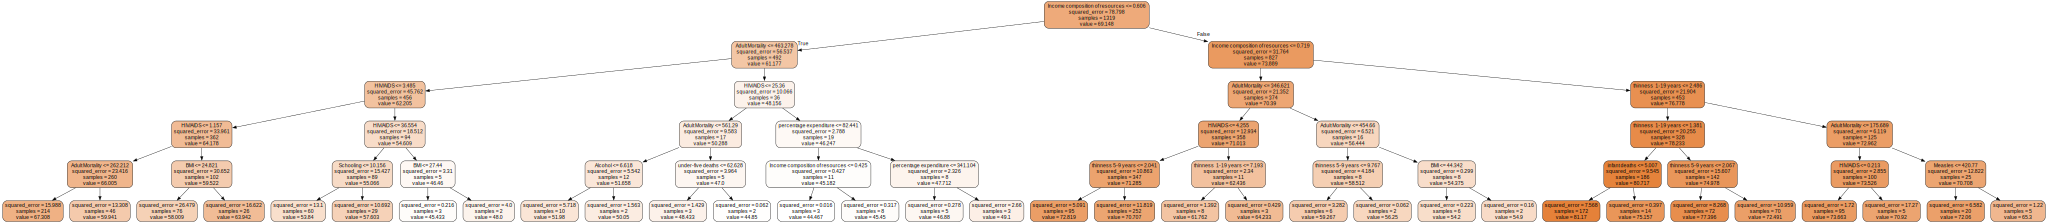

In [4]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    treeReg,
    feature_names = X.columns,
    class_names = y,
    rounded=True,
    filled=True 
)

graphviz.Source(dot_data) 

# Example
# But what is the best pruned tree?\
# Let's figure it out

Gridsearch

Fine parameter tuning

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [18]:
treeReg = DecisionTreeRegressor()

param_grid = {
    'max_depth':[3,4,5,6],         # Set the maximum depth of the tree
    'max_leaf_nodes':[None,6,7],   # Limit the maximum number of leaf nodes (optional)
    'min_samples_split':[2,3,4],   # Set the minimum samples required to split a node
    'min_samples_leaf':[1,2,3,4,5]     # Set the minimum samples required in a leaf node
    }

In [19]:
grid_search = GridSearchCV(treeReg, param_grid = param_grid, cv = 5, scoring = 'r2', refit=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_leaf_nodes': [None, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]},
             scoring='r2')

In [20]:
print('best parameters : ', grid_search.best_params_)
print('best score : ', round(grid_search.best_score_, 4))

best parameters :  {'max_depth': 6, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
best score :  0.9026


Best Decision Tree

In [21]:
bestTree = DecisionTreeRegressor(
    max_depth=6,                  # Set the maximum depth of the tree
    min_samples_split=2,          # Set the minimum samples required to split a node
    min_samples_leaf=4,           # Set the minimum samples required in a leaf node
    max_leaf_nodes=None,          # Limit the maximum number of leaf nodes (optional)
    min_impurity_decrease=0.0)


bestTree.fit(X_train, y_train)

best_pred = bestTree.predict(X_test)

In [25]:
#MSE and R squared for test and train data for the DecisionTree
mse_treeTest = mean_squared_error(y_test, best_pred)
r2_treeTest = r2_score(y_test, best_pred)

print(f"Decision Tree testing data MSE: {mse_treeTest}")  # or we can use RMSE
print(f"Decision Tree testing R score: {r2_treeTest}")

Decision Tree testing data MSE: 7.752896808326186
Decision Tree testing R score: 0.8908388397707897


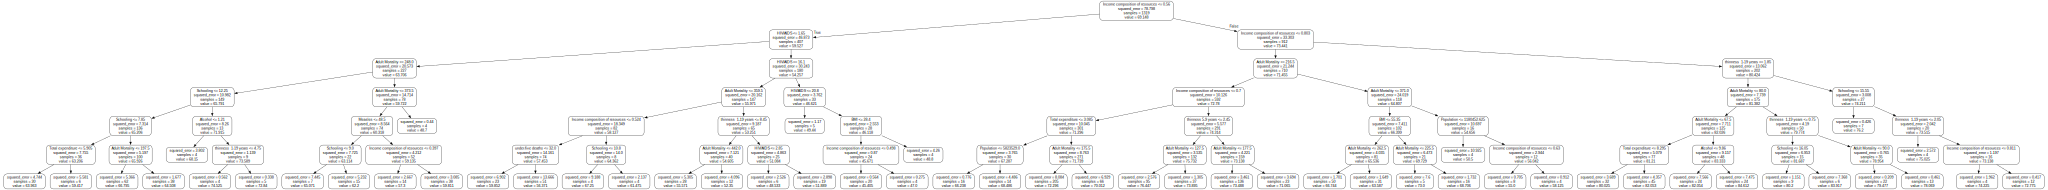

In [23]:
dot_data = export_graphviz(
    bestTree,
    feature_names = X.columns,
    class_names = y,
    rounded=True
)

graphviz.Source(dot_data) 